In [25]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET


In [26]:
img_path = "./dataset/images/fruit0.png"
annotation_path = "./dataset/annotations/fruit0.xml"

In [27]:
def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    annotations = []
    for obj in root.findall('object'):
        class_label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        annotations.append({'class': class_label, 'bbox': [xmin, ymin, xmax, ymax]})
    return annotations

In [28]:
annotations = parse_voc_annotation(annotation_path)
annotations

[{'class': 'pineapple', 'bbox': [38, 82, 271, 227]},
 {'class': 'snake fruit', 'bbox': [244, 174, 280, 207]},
 {'class': 'dragon fruit', 'bbox': [254, 228, 351, 300]}]

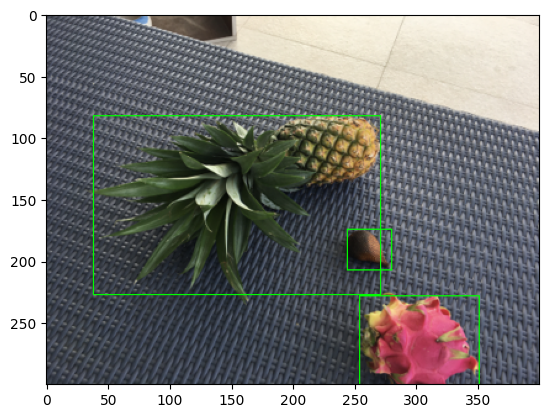

In [35]:
image = cv.imread(img_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
for i in annotations:
    x,y,w,h = i['bbox']
    cv.rectangle(image, (x,y), (w, h), (0,255,0),1)
plt.imshow(image)